### Problem Set #1: Fitting a model to data
Statistics and Data Analysis for Physics

Abby Williams

26 Sept 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in data for the exercises
data = np.loadtxt('pset1_data.txt')
x, y, sigma_y, sigma_x, rho_xy = data.T

In [3]:
# let's define a function to fit a straight line to x-y data with uncertainties in y only
def fit_a_line(x, y, sigma_y):

    # construct the matrices
    Y = y 
    A = np.column_stack((np.ones(len(Y)), x))
    C = np.diag(sigma_y**2)

    # we want to solve Y = A @ X, weighted by the covariance
    a = A.T @ np.linalg.solve(C, A)
    b = A.T @ np.linalg.solve(C, Y)

    # a X = b
    X = np.linalg.solve(a, b)

    # also return the uncertainty on the slope parameter, which can be found from the 2D output covariance matrix, a^-1
    # a = [A^T C^-1 A]

    # * SORRY for taking an inverse directly... I ran out of time and could not figure this one out
    cov = np.linalg.inv(a)

    return X, cov

### Exercise 1
Fit the line $y=mx+b$ to the $x$, $y$, and $\sigma_y$ values for data points in rows 5-20.

We want to solve $\quad Y = A\ X\quad \longrightarrow \quad X = [\ A^T C^{-1} A\ ]^{-1} [\ A^T C^{-1} Y\ ]$

In [4]:
# use the function defined above to get the best-fit parameters
[b, m], cov = fit_a_line(x[4:], y[4:], sigma_y[4:])

In [5]:
# straight line fit
x_fit = np.linspace(0, 300)
y_fit = m*x_fit + b

In [6]:
# standard deviation in parameters
sigma_b = np.sqrt(cov[0,0])
sigma_m = np.sqrt(cov[1,1])

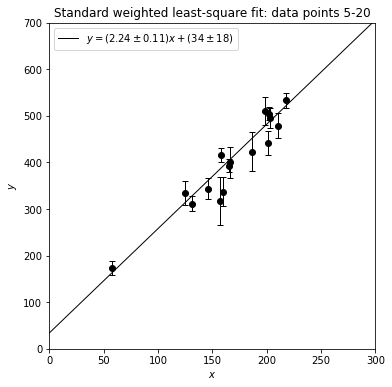

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(x[4:], y[4:], sigma_y[4:], color='k', ls='None', marker='o', capsize=3, lw=1)
ax.plot(x_fit, y_fit, color='k', lw=1, label=f'$y=({m:.2f}\pm {sigma_m:.2f})x+({b:.0f}\pm {sigma_b:.0f})$')

ax.set_box_aspect(1)
ax.set_xlim((0,300))
ax.set_ylim((0,700))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Standard weighted least-square fit: data points 5-20')
ax.legend()

Compute $\sigma^2_m$:

The parameter uncertainties can be found from the 2D output covariance matrix, $[\ A^T C^{-1} A\ ]^{-1}$ .

The elements of this matrix are
\begin{bmatrix}
\sigma^2_b  &   \sigma_{mb} \\
\sigma_{mb} &   \sigma^2_m
\end{bmatrix}

See the function defined above for computation.

In [8]:
var_m = cov[1,1]
var_m

0.011616631123297434

### Exercise 2
Repeat Exercise 1 with all the data points.

In [9]:
# get best-fit parameters
[b, m], cov = fit_a_line(x, y, sigma_y)

In [10]:
# straight line fit
x_fit = np.linspace(0, 300)
y_fit = m*x_fit + b

In [11]:
# standard deviation in parameters
sigma_b = np.sqrt(cov[0,0])
sigma_m = np.sqrt(cov[1,1])

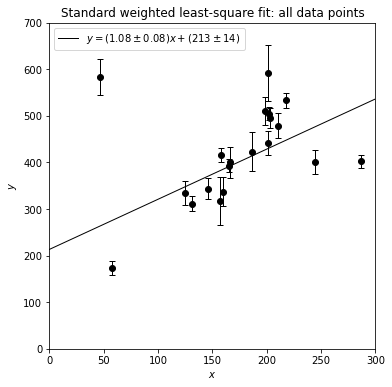

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(x, y, sigma_y, color='k', ls='None', marker='o', capsize=3, lw=1)
ax.plot(x_fit, y_fit, color='k', lw=1, label=f'$y=({m:.2f}\pm {sigma_m:.2f})x+({b:.0f}\pm {sigma_b:.0f})$')

ax.set_box_aspect(1)
ax.set_xlim((0,300))
ax.set_ylim((0,700))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Standard weighted least-square fit: all data points')
ax.legend()

Compute $\sigma^2_m$:

Same procedure as in Exercise 1.

In [13]:
var_m = cov[1,1]
var_m

0.005991810080070382

I don't particularly like that the line looks visually like a worse fit to the data.
The new inclusions have decreased the slope $m$ of the best-fit line while increasing the constant term $b$.

These new points (particularly ~(50,600), (250,400) and (280,400)) are different from those used in Exercise 1 because they look like outliers.

### Exercise 3
Generalize the method presented in the Section to fit a general quadratic relationship:

$$
g(x)=qx^2+mx+b
$$

In [14]:
# add another column to matrix A containing x_i^2, and another vector to vector X
# construct the matrices
Y = y[4:]
A = np.column_stack((np.ones(len(Y)), x[4:], x[4:]**2))
C = np.diag(sigma_y[4:]**2)

In [15]:
a = A.T @ np.linalg.solve(C, A)
b = A.T @ np.linalg.solve(C, Y)

# a X = b
X, res, _, _ = np.linalg.lstsq(a, b, rcond=None)

In [16]:
# uncertainty in parameters
cov = np.linalg.inv(a)

In [17]:
# unpack parameters
b, m, q = X

sigma_b, sigma_m, sigma_q = np.sqrt(np.diagonal(cov))

In [18]:
# quadratic fit
x_fit = np.linspace(0, 300)
y_fit = q*x_fit**2 + m*x_fit + b

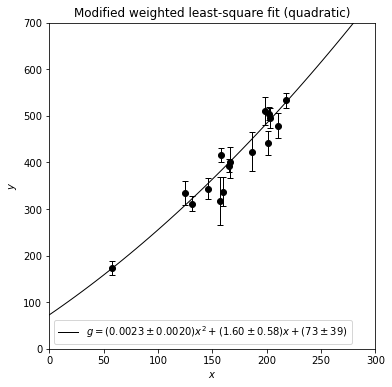

In [19]:
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(x[4:], Y, sigma_y[4:], color='k', ls='None', marker='o', capsize=3, lw=1)
ax.plot(x_fit, y_fit, color='k', lw=1, label=f'$g=({q:.4f}\pm{sigma_q:.4f})x^2+({m:.2f}\pm{sigma_m:.2f})x+({b:.0f}\pm{sigma_b:.0f})$')

ax.set_box_aspect(1)
ax.set_xlim((0,300))
ax.set_ylim((0,700))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Modified weighted least-square fit (quadratic)')
ax.legend()

### Exercise 8
Jackknife and bootstrap estimates for the uncertainty $\sigma^2_m$ from Exercise 2, 20 trials.

##### Bootstrap

Draw $N$ data points randomly from our $N$ data points, with replacement.

Using this method, the estimate of our uncertainty variance is
$$
\sigma^2_m = \frac{1}{M} \sum_{j=1}^M [m_j-m]^2
$$

In [20]:
N = len(x)  # number of data points
m = 1.08    # value of m from Exercise 2
M = 20      # number of trials

In [21]:
# array to hold our M best-fit slopes
m_js = np.zeros(M)
b_js = np.zeros(M)

In [22]:
# draw N data points randomly from our N data points, with replacement, M times
for j in range(M):
    # get indices
    idx = np.random.choice(range(N), size=N)

    # get data sample for this trial
    x_trial = x[idx]
    y_trial = y[idx]
    sigma_y_trial = sigma_y[idx]

    # fit a line to this data sample, and add this slope to our m array
    [b_js[j], m_js[j]], _ = fit_a_line(x_trial, y_trial, sigma_y_trial)

Let's plot the resulting lines to make sure it's what we would expect:

In [23]:
# straight line fit
x_fit = np.linspace(0, 300)
y_fits = [m_js[i]*x_fit + b_js[i] for i in range(M)]

Text(0.5, 1.0, 'Standard weighted least-square fit: Bootstrap')

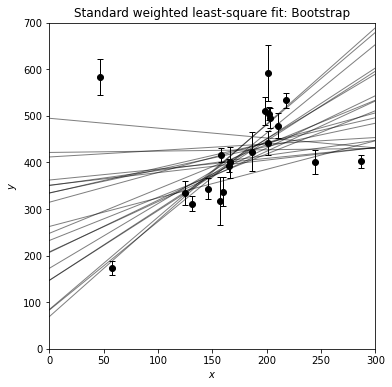

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(x, y, sigma_y, color='k', ls='None', marker='o', capsize=3, lw=1)

for i, y_fit in enumerate(y_fits):
    ax.plot(x_fit, y_fit, color='k', lw=1, alpha=0.5)

ax.set_box_aspect(1)
ax.set_xlim((0,300))
ax.set_ylim((0,700))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Standard weighted least-square fit: Bootstrap')

Calculate $\sigma^2_m$:

In [25]:
var_bootstrap = np.sum((m_js-m)**2)/M

In [26]:
var_bootstrap

0.4808000555091154

##### Jackknife

Make our measurement $N$ times, each time leaving out data point $i$.

Using this method, we have
$$
m = \frac{1}{N} \sum_{i=1}^N m_i
$$

And then the estimate of our uncertainty variance is
$$
\sigma^2_m = \frac{N-1}{N} \sum_{i=1}^N [m_i-m]^2
$$

In [27]:
N = len(x)
# array to hold our N best-fit slopes
m_is = np.zeros(N)
b_is = np.zeros(N)

In [28]:
# make our measurement N times, leaving out data point i each time
for i in range(N):
    # get data sample for this trial
    x_trial = np.append(x[:i], x[i+1:])
    y_trial = np.append(y[:i], y[i+1:])
    sigma_y_trial = np.append(sigma_y[:i], sigma_y[i+1:])

    # fit a line to this data sample, and add this slope to our m array
    [b_is[i], m_is[i]], _ = fit_a_line(x_trial, y_trial, sigma_y_trial)

Let's plot the resulting lines to make sure it's what we would expect:

In [29]:
# straight line fit
x_fit = np.linspace(0, 300)
y_fits = [m_is[i]*x_fit + b_is[i] for i in range(N)]

Text(0.5, 1.0, 'Standard weighted least-square fit: Jackknife')

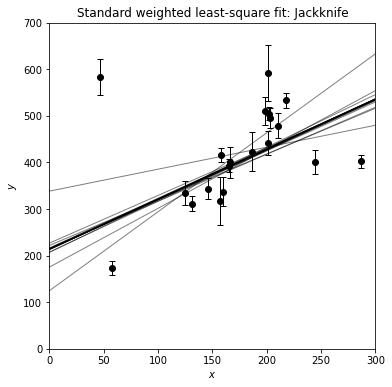

In [30]:
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(x, y, sigma_y, color='k', ls='None', marker='o', capsize=3, lw=1)

for i, y_fit in enumerate(y_fits):
    ax.plot(x_fit, y_fit, color='k', lw=1, alpha=0.5)

ax.set_box_aspect(1)
ax.set_xlim((0,300))
ax.set_ylim((0,700))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Standard weighted least-square fit: Jackknife')

Calculate $m$ and $\sigma^2_m$:

In [31]:
m_jk = np.sum(m_is)/N

In [32]:
m_jk

1.0752545538219023

In [33]:
var_jackknife = np.sum((m_is-m_jk)**2) * (N-1)/N

In [34]:
var_jackknife

0.7639460804701281

How do the uncertainties compare and which seems most reasonable, given the data and the uncertainties on the data?

The uncertainties in the slope are of the same order, though the uncertainty using jackknife is about twice as large as that found using bootstrap, which is interesting to me considering that visually, I would expect the uncertainty on the bootstrap fit to be larger.
This makes sense considering the two different factors in front the sums, $\frac{1}{N}$ for bootstrap and $\frac{N-1}{N}$ for jackknife. Then it is true that the sum of the "raw residuals" is larger for bootstrap.

In many ways I would consider bootstrap to be the more reasonable, especially given the presence of the outliers.
It's the more conservative method, in the sense that it gives us the largest estimate of uncertainty.
Jackknife is more constrained to the data itself, since it only leaves out one point at a time, otherwise including every other point once.
By contrast, one of the samplings in bootstrap could in principle comprise only a single data point $N$ times.